# Data Analysis

Iremos realizar algumas análises nos dados

# 1. Knowing data

## 1.1Reading dataset 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import f_oneway

In [2]:
#Path to data
data_path = os.path.dirname(os.getcwd()) + '/Data/'

#Read data
df_parkinson_hw = pd.read_csv(data_path + '/handwrite/parkinson_hw_velocity.csv')

#Read data
df_parkinson_hand = pd.read_csv(data_path + '/tappy-keystroke/parkinson_tappy_hand.csv',index_col='id')
df_parkinson_direction = pd.read_csv(data_path + '/tappy-keystroke/parkinson_tappy_direction.csv',index_col='id')

## 1.2 Description of data

In [3]:
#Show some lines
df_parkinson_hw.head()

,id,test_id,mean,std,parkinson
0,C_0001,0,0.141651,0.059887,False
1,C_0001,1,0.115728,0.045593,False
2,C_0002,0,0.110237,0.047274,False
3,C_0002,1,0.110989,0.044529,False
4,C_0003,0,0.087412,0.034963,False


In [4]:
#Show some lines
df_parkinson_hand.head()

,parkinson,flight_L_mean,flight_L_std,flight_R_mean,flight_R_std,flight_S_mean,flight_S_std,hold_time_L_mean,hold_time_L_std,hold_time_R_mean,hold_time_R_std,hold_time_S_mean,hold_time_S_std,latency_L_mean,latency_L_std,latency_R_mean,latency_R_std,latency_S_mean,latency_S_std
id,,,,,,,,,,,,,,,,,,,
0QAZFRHQHW,False,320.707753,162.630305,301.498318,176.120861,267.954248,150.896623,98.703006,23.714577,100.464299,27.230957,122.901961,32.275163,424.494462,167.576160,403.607850,176.467903,360.824183,152.831418
1HOEBIGASW,False,395.186667,171.637565,417.916667,224.078529,218.750000,44.194174,66.146667,12.169938,65.036667,11.677166,62.500000,22.061732,464.326667,167.838787,485.160000,226.075791,265.650000,44.194174
1XNJCXS3EY,False,230.838588,81.494048,192.711658,90.382439,218.456098,91.195429,151.377412,49.211430,105.872495,26.889871,94.364228,31.550231,341.676235,88.205234,321.553552,87.570039,342.143089,87.761537
3DIXPRIOSW,False,363.319505,144.875266,364.293865,174.059974,414.512903,208.755589,147.685007,47.309308,167.651534,55.911954,133.454839,73.236375,522.839156,137.683201,529.550000,151.403828,549.593548,229.476882
4XPHKKBXS6,False,411.762227,162.102246,354.343564,161.914258,267.030196,166.837645,187.157540,61.434160,141.478218,42.247092,152.782353,44.026320,567.528770,165.318348,538.134371,155.105284,467.000000,146.343589


In [5]:
#Show some lines
df_parkinson_direction.head()

,parkinson,flight_LL_mean,flight_LL_std,flight_LR_mean,flight_LR_std,flight_LS_mean,flight_LS_std,flight_RL_mean,flight_RL_std,flight_RR_mean,...,latency_RR_mean,latency_RR_std,latency_RS_mean,latency_RS_std,latency_SL_mean,latency_SL_std,latency_SR_mean,latency_SR_std,latency_SS_mean,latency_SS_std
id,,,,,,,,,,,,,,,,,,,,,
0QAZFRHQHW,False,311.500324,159.143009,310.504167,193.287477,236.490698,146.680950,327.822747,169.545793,268.913147,...,369.526295,152.551529,447.746296,127.574478,456.385556,159.090533,536.850000,128.706687,185.415385,50.252609
1HOEBIGASW,False,331.181250,203.431404,529.633333,185.530631,250.000000,110.072734,468.335714,84.626352,329.635294,...,394.647059,220.782942,234.400000,113.035633,377.937352,130.556635,640.600000,129.619425,276.116225,110.904066
1XNJCXS3EY,False,225.400495,78.265290,164.200714,94.073860,183.425862,88.636556,234.096341,84.931588,216.264286,...,324.484034,79.283101,377.055102,67.965898,319.938983,84.754636,355.100000,61.743129,247.925000,78.711189
3DIXPRIOSW,False,374.582520,137.382887,436.250442,157.125706,490.600000,140.418240,333.807292,158.785785,324.156459,...,505.488517,148.670416,649.610000,220.355543,587.266667,139.538250,489.275000,78.744286,367.980000,212.974572
4XPHKKBXS6,False,359.709225,168.209095,321.958235,153.239475,199.115132,157.060407,477.538947,132.421596,369.413836,...,512.004403,174.976327,523.096000,119.724731,614.935714,116.443768,632.536735,100.343134,276.033333,111.650004


<b>handwrite:</b>

- id: Idenficador único da pessoa.
- test_id: Tipo do teste sendo realizado.
- mean: Média da velocidade.
- std: Desvio padrão da velocidade.
- parkinson: Indicação se possui parkinson ou não.

<b>hand e direction:</b>

- hand: Tecla do lado esquerdo (L), direito (R) ou espaço (S) pressionada.
- direction: Tecla anterior e posterior.
- hold_time: Quanto tempo ficou segurando a tecla (milisegundos).
- latency: Tempo entre pressionar a tecla anterior e posterior (milisegundos).
- flight: Tempo entre soltar a tecla anterior e pressionar a posterior (milisegundos).

Observações: 
- flight = latency - hold_time

# 2. Statistical Analysis

## 2.1 Dataset handwrite

In [6]:
#Apply boxcox to improve visualization
df_parkinson_hw['mean'],_ = boxcox(df_parkinson_hw['mean'])
df_parkinson_hw['std'],_ = boxcox(df_parkinson_hw['std'])

In [7]:
#Proportion of people with and without parkinson
df_parkinson_hw['parkinson'].value_counts() / df_parkinson_hw.shape[0]

True     0.815
False    0.185
Name: parkinson, dtype: float64

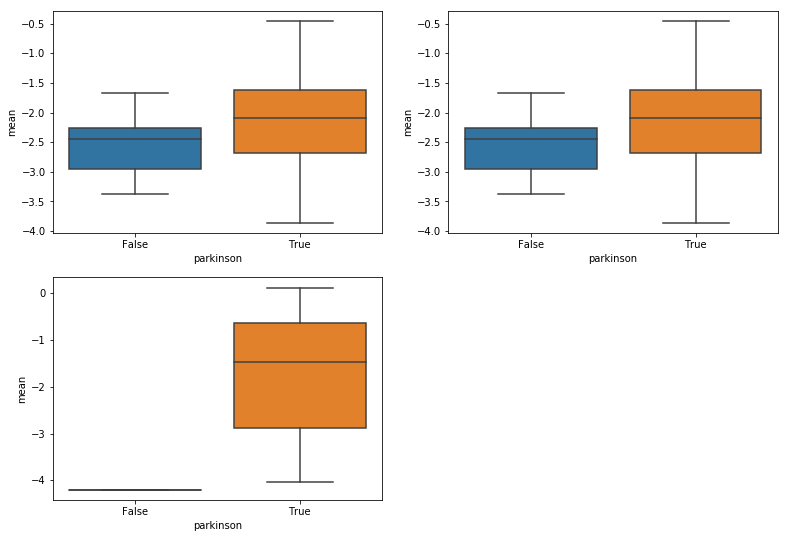

In [8]:
#Boxplot for each test
plt.figure(figsize=(13,9))
plt.subplot(221)
sns.boxplot(data=df_parkinson_hw[df_parkinson_hw['test_id'] == 0],x='parkinson',y='mean')
plt.subplot(222)
sns.boxplot(data=df_parkinson_hw[df_parkinson_hw['test_id'] == 0],x='parkinson',y='mean')
plt.subplot(223)
sns.boxplot(data=df_parkinson_hw[df_parkinson_hw['test_id'] == 2],x='parkinson',y='mean')
plt.show()

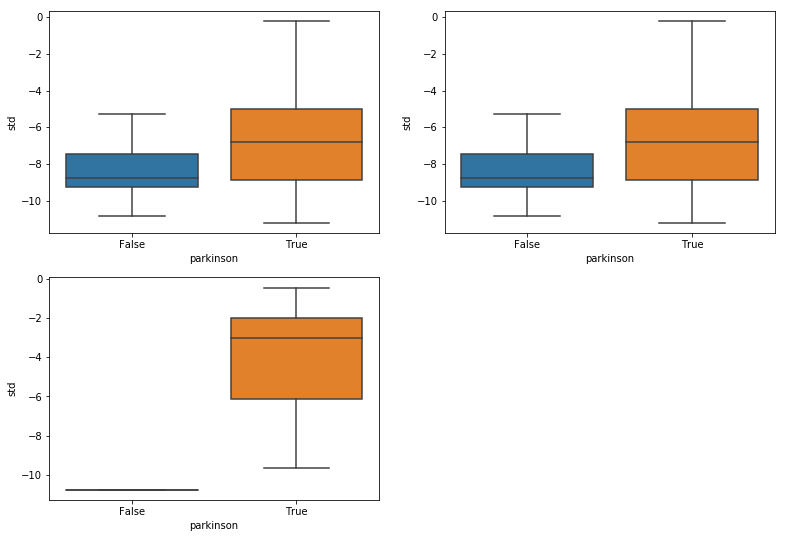

In [9]:
#Boxplot for each test
plt.figure(figsize=(13,9))
plt.subplot(221)
sns.boxplot(data=df_parkinson_hw[df_parkinson_hw['test_id'] == 0],x='parkinson',y='std')
plt.subplot(222)
sns.boxplot(data=df_parkinson_hw[df_parkinson_hw['test_id'] == 0],x='parkinson',y='std')
plt.subplot(223)
sns.boxplot(data=df_parkinson_hw[df_parkinson_hw['test_id'] == 2],x='parkinson',y='std')
plt.show()

Podemos ver que aparentemente não há uma diferença significativa entre os dois grupos, apesar de que pessoas com parkinson tendem a ter uma variabilidade maior na velocidade.

/home/sugi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


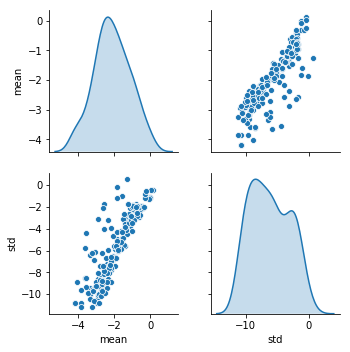

In [10]:
#Pairplot
sns.pairplot(data=df_parkinson_hw,vars=['mean','std'],diag_kind='kde')
plt.show()

Existe uma relação aparentemente linear com a média das velocidades e o desvio padrão. Ambas aparentam ser aproxidamente normais.

In [11]:
#Anova
x1 = df_parkinson_hw.loc[(df_parkinson_hw['test_id'] == 0) & (df_parkinson_hw['parkinson'] == False),'mean']
x2 = df_parkinson_hw.loc[(df_parkinson_hw['test_id'] == 0) & (df_parkinson_hw['parkinson'] == True),'mean']
f_oneway(x1,x2)

F_onewayResult(statistic=4.292243388721951, pvalue=0.04177217742247906)

In [12]:
#Anova
x1 = df_parkinson_hw.loc[(df_parkinson_hw['test_id'] == 1) & (df_parkinson_hw['parkinson'] == False),'mean']
x2 = df_parkinson_hw.loc[(df_parkinson_hw['test_id'] == 1) & (df_parkinson_hw['parkinson'] == True),'mean']
f_oneway(x1,x2)

F_onewayResult(statistic=9.59950344147936, pvalue=0.002801336472199426)

In [13]:
#Anova
x1 = df_parkinson_hw.loc[(df_parkinson_hw['test_id'] == 2) & (df_parkinson_hw['parkinson'] == False),'mean']
x2 = df_parkinson_hw.loc[(df_parkinson_hw['test_id'] == 2) & (df_parkinson_hw['parkinson'] == True),'mean']
f_oneway(x1,x2)

F_onewayResult(statistic=25.155361303803286, pvalue=7.045325264536856e-06)

Pelo teste de anova podemos ver que existe uma diferença estatística significante entre os dois grupos, principlamente no teste 1. 

## 2.2 Dataset hand and direction

In [14]:
#Some statistics
df_parkinson_hand.describe()

,flight_L_mean,flight_L_std,flight_R_mean,flight_R_std,flight_S_mean,flight_S_std,hold_time_L_mean,hold_time_L_std,hold_time_R_mean,hold_time_R_std,hold_time_S_mean,hold_time_S_std,latency_L_mean,latency_L_std,latency_R_mean,latency_R_std,latency_S_mean,latency_S_std
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,252.744886,126.852628,248.552883,132.378403,224.499869,115.017828,119.049427,40.928455,113.004438,35.833477,125.618617,34.481713,352.111833,127.076573,350.926630,131.703541,337.272543,114.631185
std,91.270933,34.216210,89.163875,37.839416,88.946137,35.341733,32.785761,18.013192,30.882391,16.079628,37.035743,15.967302,110.912585,33.683377,105.346589,40.042532,102.747494,36.543845
min,109.400000,13.859293,105.483844,40.710048,79.096599,11.030866,54.691557,2.757716,56.608325,0.000000,56.128179,4.761687,165.026526,16.617009,173.131632,47.272719,148.388724,2.757716
25%,183.680143,100.068300,179.489188,98.910497,156.310796,87.207173,95.994330,27.770615,91.899286,24.799466,98.961638,23.875451,262.376006,97.311582,268.031985,95.153802,258.183127,85.704823
50%,227.882603,129.304583,227.687303,134.083840,211.033891,114.810921,113.155571,37.398923,110.123626,33.547378,120.045660,32.892955,330.853445,130.724800,330.137421,131.549226,328.287451,114.116989
75%,313.033422,153.683175,317.428596,158.517233,268.018414,139.157065,144.000299,53.671950,127.651271,46.298061,144.981664,39.168079,424.825787,154.241293,431.062131,160.620030,392.855735,137.949083
max,535.200000,219.693664,494.640213,264.581960,664.100000,208.755589,206.903333,101.693650,242.200000,110.008372,281.711765,102.135105,666.000000,206.143505,607.119923,267.752815,742.200000,229.476882


In [15]:
#Some statistics
df_parkinson_direction.describe()

,flight_LL_mean,flight_LL_std,flight_LR_mean,flight_LR_std,flight_LS_mean,flight_LS_std,flight_RL_mean,flight_RL_std,flight_RR_mean,flight_RR_std,...,latency_RR_mean,latency_RR_std,latency_RS_mean,latency_RS_std,latency_SL_mean,latency_SL_std,latency_SR_mean,latency_SR_std,latency_SS_mean,latency_SS_std
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,241.134809,119.463396,247.786152,133.607840,218.455589,112.575327,260.583518,122.518972,242.953419,119.744706,...,342.844401,122.735254,358.649105,107.430679,371.265342,127.730297,397.069089,125.572623,290.646170,107.803992
std,80.821273,33.649633,114.621225,40.722622,102.111528,33.142480,116.037581,36.819768,80.926317,37.613531,...,97.092345,39.001552,105.885536,35.182509,122.583774,40.580900,125.766328,40.871326,82.989251,44.026512
min,111.022741,19.403157,93.376191,28.961397,46.900000,12.445079,95.964609,25.622978,114.366863,13.788582,...,174.922222,8.343860,160.102375,5.515433,141.927187,5.515433,164.216314,5.515433,93.800000,0.000000
25%,178.980724,93.376307,163.671999,100.929947,146.371833,90.490739,168.941415,96.953156,181.642898,90.374234,...,267.882674,93.550818,276.026081,80.964402,277.875756,99.627073,306.956739,96.989128,237.927489,82.885608
50%,221.020710,119.648718,213.867597,133.752742,199.146318,113.368074,234.410671,121.845181,227.629670,118.597641,...,329.488229,120.651106,345.585994,107.611200,364.231690,128.408860,396.179994,124.290717,282.229371,106.821981
75%,291.658408,143.558095,310.771849,160.740845,252.845274,135.523003,329.391009,145.589720,303.388561,144.820229,...,405.605333,149.701848,421.875000,129.301208,435.058166,156.416712,467.954613,154.160733,309.979916,121.176004
max,484.400000,208.502880,703.100000,308.010794,664.100000,187.123678,595.700000,238.540639,477.160000,270.680476,...,614.600000,254.134177,665.366667,227.801909,722.675000,225.791445,796.900000,263.339369,652.300000,299.021722


In [16]:
#Amount of samples
df_parkinson_hand.shape

(212, 19)

In [17]:
#Amount of samples
df_parkinson_direction.shape

(212, 55)

In [18]:
#Proportion of parkinson in each group
df_parkinson_hand['parkinson'].value_counts() / df_parkinson_hand.shape[0]

True     0.759434
False    0.240566
Name: parkinson, dtype: float64

In [19]:
#Proportion of parkinson in each group
df_parkinson_direction['parkinson'].value_counts() / df_parkinson_direction.shape[0]

True     0.759434
False    0.240566
Name: parkinson, dtype: float64

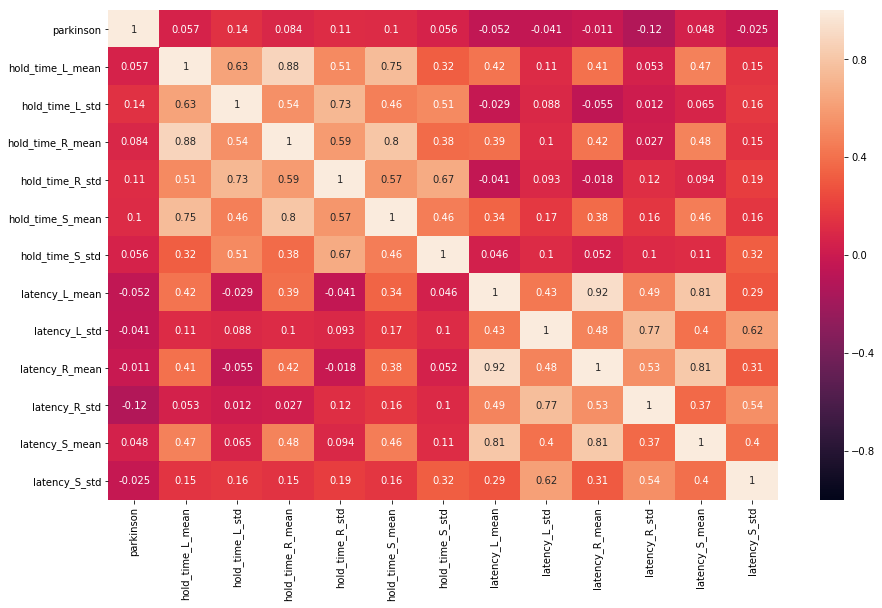

In [20]:
#Exclude columns with flight
cols = list(filter(lambda x: 'flight' not  in x,df_parkinson_hand.columns))

#Heatmap
plt.figure(figsize=(15,9))
sns.heatmap(df_parkinson_hand.loc[:,cols].corr(),vmin=-1,vmax=1,annot=True)
plt.show()

Podemos ver que hold não possui correlações fortes com latency. Apesar disso, as combinações de hold e latency  nas métricas acabam sendo correlacionados (algumas vezes). 

Em geral notamos que as médias e desvios são iguais para ambos os lados, ou seja, a assimetria não é muita.

Observação: Não calculado a correlação para flight devido a sua fórmula.

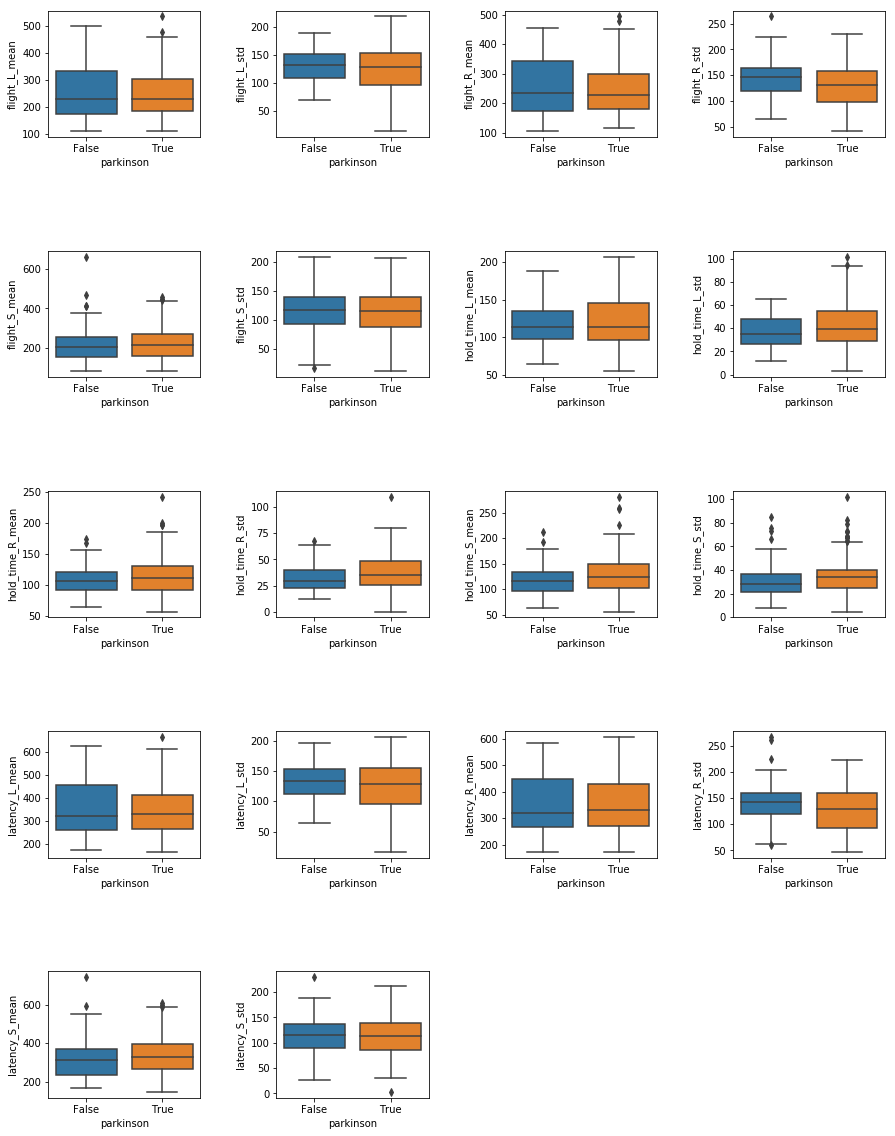

In [21]:
#Columns that have metric to evaluate
cols_metric = df_parkinson_hand.columns[1:]

#Boxplot of each metric
plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=0.5,hspace=0.9)
for index,metric in enumerate(cols_metric):
    plt.subplot(5,4,index+1)
    sns.boxplot(data=df_parkinson_hand,x='parkinson',y=metric)

É interessante notar que de modo geral as pessoas com parkinson tendem a ter uma variação maior ao clicar nas teclas.

Ademais, dependendo da tecla e do tempo sendo calculado vimos que as pessoas com parkison podem ou não ser mais rápidas.